In [16]:
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, LSTM
from keras.layers.merge import concatenate
from keras.callbacks import TensorBoard

In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [3]:
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

print('input 1 :\n\t {}'.format(in_seq1))
print('input 2 :\n\t {}'.format(in_seq2))
print('output :\n\t {}'.format(out_seq))

input 1 :
	 [10 20 30 40 50 60 70 80 90]
input 2 :
	 [15 25 35 45 55 65 75 85 95]
output :
	 [ 25  45  65  85 105 125 145 165 185]


In [4]:
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

In [5]:
dataset = hstack((in_seq1, in_seq2, out_seq))
dataset

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [6]:
# choose a number of time steps
n_steps = 3

X, y = split_sequences(dataset, n_steps)
print('X: ')
print(X)
print()
print('y: ')
print(y)

X: 
[[[10 15]
  [20 25]
  [30 35]]

 [[20 25]
  [30 35]
  [40 45]]

 [[30 35]
  [40 45]
  [50 55]]

 [[40 45]
  [50 55]
  [60 65]]

 [[50 55]
  [60 65]
  [70 75]]

 [[60 65]
  [70 75]
  [80 85]]

 [[70 75]
  [80 85]
  [90 95]]]

y: 
[ 65  85 105 125 145 165 185]


In [7]:
# separate input data
X1 = X[:, :, 0]
X2 = X[:, :, 1]
print(X1)
print('-'*20)
print(X2)

[[10 20 30]
 [20 30 40]
 [30 40 50]
 [40 50 60]
 [50 60 70]
 [60 70 80]
 [70 80 90]]
--------------------
[[15 25 35]
 [25 35 45]
 [35 45 55]
 [45 55 65]
 [55 65 75]
 [65 75 85]
 [75 85 95]]


In [17]:
# first input model
visible1 = Input(shape=(n_steps,))
dense1 = Dense(100, activation='relu')(visible1)
# second input model
visible2 = Input(shape=(3, 1))
dense2 = LSTM(50, activation='relu')(visible2)
# LSTM(50, activation='relu', input_shape=(n_steps, n_features))
# merge input models
merge = concatenate([dense1, dense2])
output = Dense(1)(merge)
model = Model(inputs=[visible1, visible2], outputs=output)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 100)          400         input_3[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 50)           10400       input_4[0][0]                    
____________________________________________________________________________________________

In [18]:
callbacks = [
    TensorBoard(
        log_dir='my_log_dir', histogram_freq=1, embeddings_freq=1,
    )]


model.compile(optimizer='adam', loss='mse')
history = model.fit([X1, X2], y, epochs=1700, callbacks=callbacks, verbose=2)

/usr/local/anaconda3/lib/python3.7/site-packages/keras/callbacks/tensorboard_v2.py:102: UserWarning: The TensorBoard callback does not support embeddings display when using TensorFlow 2.0. Embeddings-related arguments are ignored.
  warnings.warn('The TensorBoard callback does not support '


Epoch 1/1700
1/1 - 0s - loss: 20185.6562
Epoch 2/1700
1/1 - 0s - loss: 19591.4902
Epoch 3/1700
1/1 - 0s - loss: 19007.8164
Epoch 4/1700
1/1 - 0s - loss: 18436.1367
Epoch 5/1700
1/1 - 0s - loss: 17875.6523
Epoch 6/1700
1/1 - 0s - loss: 17326.4551
Epoch 7/1700
1/1 - 0s - loss: 16787.8633
Epoch 8/1700
1/1 - 0s - loss: 16260.6309
Epoch 9/1700
1/1 - 0s - loss: 15744.7090
Epoch 10/1700
1/1 - 0s - loss: 15239.2754
Epoch 11/1700
1/1 - 0s - loss: 14744.1875
Epoch 12/1700
1/1 - 0s - loss: 14258.9863
Epoch 13/1700
1/1 - 0s - loss: 13783.5146
Epoch 14/1700
1/1 - 0s - loss: 13316.8887
Epoch 15/1700
1/1 - 0s - loss: 12860.0547
Epoch 16/1700
1/1 - 0s - loss: 12412.7939
Epoch 17/1700
1/1 - 0s - loss: 11975.2607
Epoch 18/1700
1/1 - 0s - loss: 11547.4619
Epoch 19/1700
1/1 - 0s - loss: 11128.4824
Epoch 20/1700
1/1 - 0s - loss: 10717.0156
Epoch 21/1700
1/1 - 0s - loss: 10311.8799
Epoch 22/1700
1/1 - 0s - loss: 9912.3271
Epoch 23/1700
1/1 - 0s - loss: 9517.3574
Epoch 24/1700
1/1 - 0s - loss: 9125.6592
Epoc

Epoch 208/1700
1/1 - 0s - loss: 0.1718
Epoch 209/1700
1/1 - 0s - loss: 0.1696
Epoch 210/1700
1/1 - 0s - loss: 0.1674
Epoch 211/1700
1/1 - 0s - loss: 0.1653
Epoch 212/1700
1/1 - 0s - loss: 0.1632
Epoch 213/1700
1/1 - 0s - loss: 0.1611
Epoch 214/1700
1/1 - 0s - loss: 0.1590
Epoch 215/1700
1/1 - 0s - loss: 0.1569
Epoch 216/1700
1/1 - 0s - loss: 0.1549
Epoch 217/1700
1/1 - 0s - loss: 0.1528
Epoch 218/1700
1/1 - 0s - loss: 0.1507
Epoch 219/1700
1/1 - 0s - loss: 0.1487
Epoch 220/1700
1/1 - 0s - loss: 0.1467
Epoch 221/1700
1/1 - 0s - loss: 0.1448
Epoch 222/1700
1/1 - 0s - loss: 0.1428
Epoch 223/1700
1/1 - 0s - loss: 0.1409
Epoch 224/1700
1/1 - 0s - loss: 0.1390
Epoch 225/1700
1/1 - 0s - loss: 0.1371
Epoch 226/1700
1/1 - 0s - loss: 0.1352
Epoch 227/1700
1/1 - 0s - loss: 0.1333
Epoch 228/1700
1/1 - 0s - loss: 0.1314
Epoch 229/1700
1/1 - 0s - loss: 0.1296
Epoch 230/1700
1/1 - 0s - loss: 0.1278
Epoch 231/1700
1/1 - 0s - loss: 0.1260
Epoch 232/1700
1/1 - 0s - loss: 0.1242
Epoch 233/1700
1/1 - 0s -

1/1 - 0s - loss: 0.0048
Epoch 419/1700
1/1 - 0s - loss: 0.0048
Epoch 420/1700
1/1 - 0s - loss: 0.0048
Epoch 421/1700
1/1 - 0s - loss: 0.0047
Epoch 422/1700
1/1 - 0s - loss: 0.0047
Epoch 423/1700
1/1 - 0s - loss: 0.0047
Epoch 424/1700
1/1 - 0s - loss: 0.0047
Epoch 425/1700
1/1 - 0s - loss: 0.0046
Epoch 426/1700
1/1 - 0s - loss: 0.0046
Epoch 427/1700
1/1 - 0s - loss: 0.0046
Epoch 428/1700
1/1 - 0s - loss: 0.0046
Epoch 429/1700
1/1 - 0s - loss: 0.0045
Epoch 430/1700
1/1 - 0s - loss: 0.0045
Epoch 431/1700
1/1 - 0s - loss: 0.0045
Epoch 432/1700
1/1 - 0s - loss: 0.0045
Epoch 433/1700
1/1 - 0s - loss: 0.0044
Epoch 434/1700
1/1 - 0s - loss: 0.0044
Epoch 435/1700
1/1 - 0s - loss: 0.0044
Epoch 436/1700
1/1 - 0s - loss: 0.0044
Epoch 437/1700
1/1 - 0s - loss: 0.0044
Epoch 438/1700
1/1 - 0s - loss: 0.0043
Epoch 439/1700
1/1 - 0s - loss: 0.0043
Epoch 440/1700
1/1 - 0s - loss: 0.0043
Epoch 441/1700
1/1 - 0s - loss: 0.0043
Epoch 442/1700
1/1 - 0s - loss: 0.0043
Epoch 443/1700
1/1 - 0s - loss: 0.0042
E

Epoch 629/1700
1/1 - 0s - loss: 0.0032
Epoch 630/1700
1/1 - 0s - loss: 0.0032
Epoch 631/1700
1/1 - 0s - loss: 0.0032
Epoch 632/1700
1/1 - 0s - loss: 0.0032
Epoch 633/1700
1/1 - 0s - loss: 0.0031
Epoch 634/1700
1/1 - 0s - loss: 0.0031
Epoch 635/1700
1/1 - 0s - loss: 0.0031
Epoch 636/1700
1/1 - 0s - loss: 0.0031
Epoch 637/1700
1/1 - 0s - loss: 0.0031
Epoch 638/1700
1/1 - 0s - loss: 0.0031
Epoch 639/1700
1/1 - 0s - loss: 0.0031
Epoch 640/1700
1/1 - 0s - loss: 0.0031
Epoch 641/1700
1/1 - 0s - loss: 0.0031
Epoch 642/1700
1/1 - 0s - loss: 0.0031
Epoch 643/1700
1/1 - 0s - loss: 0.0031
Epoch 644/1700
1/1 - 0s - loss: 0.0031
Epoch 645/1700
1/1 - 0s - loss: 0.0031
Epoch 646/1700
1/1 - 0s - loss: 0.0031
Epoch 647/1700
1/1 - 0s - loss: 0.0031
Epoch 648/1700
1/1 - 0s - loss: 0.0031
Epoch 649/1700
1/1 - 0s - loss: 0.0031
Epoch 650/1700
1/1 - 0s - loss: 0.0031
Epoch 651/1700
1/1 - 0s - loss: 0.0031
Epoch 652/1700
1/1 - 0s - loss: 0.0031
Epoch 653/1700
1/1 - 0s - loss: 0.0031
Epoch 654/1700
1/1 - 0s -

Epoch 839/1700
1/1 - 0s - loss: 0.0025
Epoch 840/1700
1/1 - 0s - loss: 0.0025
Epoch 841/1700
1/1 - 0s - loss: 0.0025
Epoch 842/1700
1/1 - 0s - loss: 0.0025
Epoch 843/1700
1/1 - 0s - loss: 0.0025
Epoch 844/1700
1/1 - 0s - loss: 0.0025
Epoch 845/1700
1/1 - 0s - loss: 0.0025
Epoch 846/1700
1/1 - 0s - loss: 0.0025
Epoch 847/1700
1/1 - 0s - loss: 0.0024
Epoch 848/1700
1/1 - 0s - loss: 0.0024
Epoch 849/1700
1/1 - 0s - loss: 0.0024
Epoch 850/1700
1/1 - 0s - loss: 0.0024
Epoch 851/1700
1/1 - 0s - loss: 0.0024
Epoch 852/1700
1/1 - 0s - loss: 0.0024
Epoch 853/1700
1/1 - 0s - loss: 0.0024
Epoch 854/1700
1/1 - 0s - loss: 0.0024
Epoch 855/1700
1/1 - 0s - loss: 0.0024
Epoch 856/1700
1/1 - 0s - loss: 0.0024
Epoch 857/1700
1/1 - 0s - loss: 0.0024
Epoch 858/1700
1/1 - 0s - loss: 0.0024
Epoch 859/1700
1/1 - 0s - loss: 0.0024
Epoch 860/1700
1/1 - 0s - loss: 0.0024
Epoch 861/1700
1/1 - 0s - loss: 0.0024
Epoch 862/1700
1/1 - 0s - loss: 0.0024
Epoch 863/1700
1/1 - 0s - loss: 0.0024
Epoch 864/1700
1/1 - 0s -

Epoch 1048/1700
1/1 - 0s - loss: 0.0019
Epoch 1049/1700
1/1 - 0s - loss: 0.0019
Epoch 1050/1700
1/1 - 0s - loss: 0.0019
Epoch 1051/1700
1/1 - 0s - loss: 0.0019
Epoch 1052/1700
1/1 - 0s - loss: 0.0019
Epoch 1053/1700
1/1 - 0s - loss: 0.0019
Epoch 1054/1700
1/1 - 0s - loss: 0.0019
Epoch 1055/1700
1/1 - 0s - loss: 0.0019
Epoch 1056/1700
1/1 - 0s - loss: 0.0019
Epoch 1057/1700
1/1 - 0s - loss: 0.0019
Epoch 1058/1700
1/1 - 0s - loss: 0.0019
Epoch 1059/1700
1/1 - 0s - loss: 0.0019
Epoch 1060/1700
1/1 - 0s - loss: 0.0019
Epoch 1061/1700
1/1 - 0s - loss: 0.0019
Epoch 1062/1700
1/1 - 0s - loss: 0.0019
Epoch 1063/1700
1/1 - 0s - loss: 0.0019
Epoch 1064/1700
1/1 - 0s - loss: 0.0019
Epoch 1065/1700
1/1 - 0s - loss: 0.0019
Epoch 1066/1700
1/1 - 0s - loss: 0.0019
Epoch 1067/1700
1/1 - 0s - loss: 0.0019
Epoch 1068/1700
1/1 - 0s - loss: 0.0019
Epoch 1069/1700
1/1 - 0s - loss: 0.0019
Epoch 1070/1700
1/1 - 0s - loss: 0.0019
Epoch 1071/1700
1/1 - 0s - loss: 0.0019
Epoch 1072/1700
1/1 - 0s - loss: 0.0019


Epoch 1253/1700
1/1 - 0s - loss: 0.0016
Epoch 1254/1700
1/1 - 0s - loss: 0.0016
Epoch 1255/1700
1/1 - 0s - loss: 0.0015
Epoch 1256/1700
1/1 - 0s - loss: 0.0015
Epoch 1257/1700
1/1 - 0s - loss: 0.0015
Epoch 1258/1700
1/1 - 0s - loss: 0.0015
Epoch 1259/1700
1/1 - 0s - loss: 0.0015
Epoch 1260/1700
1/1 - 0s - loss: 0.0015
Epoch 1261/1700
1/1 - 0s - loss: 0.0015
Epoch 1262/1700
1/1 - 0s - loss: 0.0015
Epoch 1263/1700
1/1 - 0s - loss: 0.0015
Epoch 1264/1700
1/1 - 0s - loss: 0.0015
Epoch 1265/1700
1/1 - 0s - loss: 0.0015
Epoch 1266/1700
1/1 - 0s - loss: 0.0015
Epoch 1267/1700
1/1 - 0s - loss: 0.0015
Epoch 1268/1700
1/1 - 0s - loss: 0.0015
Epoch 1269/1700
1/1 - 0s - loss: 0.0015
Epoch 1270/1700
1/1 - 0s - loss: 0.0015
Epoch 1271/1700
1/1 - 0s - loss: 0.0015
Epoch 1272/1700
1/1 - 0s - loss: 0.0015
Epoch 1273/1700
1/1 - 0s - loss: 0.0015
Epoch 1274/1700
1/1 - 0s - loss: 0.0015
Epoch 1275/1700
1/1 - 0s - loss: 0.0015
Epoch 1276/1700
1/1 - 0s - loss: 0.0015
Epoch 1277/1700
1/1 - 0s - loss: 0.0015


Epoch 1458/1700
1/1 - 0s - loss: 0.0012
Epoch 1459/1700
1/1 - 0s - loss: 0.0012
Epoch 1460/1700
1/1 - 0s - loss: 0.0012
Epoch 1461/1700
1/1 - 0s - loss: 0.0012
Epoch 1462/1700
1/1 - 0s - loss: 0.0012
Epoch 1463/1700
1/1 - 0s - loss: 0.0012
Epoch 1464/1700
1/1 - 0s - loss: 0.0012
Epoch 1465/1700
1/1 - 0s - loss: 0.0012
Epoch 1466/1700
1/1 - 0s - loss: 0.0012
Epoch 1467/1700
1/1 - 0s - loss: 0.0012
Epoch 1468/1700
1/1 - 0s - loss: 0.0012
Epoch 1469/1700
1/1 - 0s - loss: 0.0012
Epoch 1470/1700
1/1 - 0s - loss: 0.0012
Epoch 1471/1700
1/1 - 0s - loss: 0.0012
Epoch 1472/1700
1/1 - 0s - loss: 0.0012
Epoch 1473/1700
1/1 - 0s - loss: 0.0012
Epoch 1474/1700
1/1 - 0s - loss: 0.0012
Epoch 1475/1700
1/1 - 0s - loss: 0.0012
Epoch 1476/1700
1/1 - 0s - loss: 0.0012
Epoch 1477/1700
1/1 - 0s - loss: 0.0012
Epoch 1478/1700
1/1 - 0s - loss: 0.0012
Epoch 1479/1700
1/1 - 0s - loss: 0.0012
Epoch 1480/1700
1/1 - 0s - loss: 0.0012
Epoch 1481/1700
1/1 - 0s - loss: 0.0012
Epoch 1482/1700
1/1 - 0s - loss: 0.0012


Epoch 1663/1700
1/1 - 0s - loss: 0.0010
Epoch 1664/1700
1/1 - 0s - loss: 0.0010
Epoch 1665/1700
1/1 - 0s - loss: 0.0010
Epoch 1666/1700
1/1 - 0s - loss: 0.0010
Epoch 1667/1700
1/1 - 0s - loss: 0.0010
Epoch 1668/1700
1/1 - 0s - loss: 0.0010
Epoch 1669/1700
1/1 - 0s - loss: 0.0010
Epoch 1670/1700
1/1 - 0s - loss: 0.0010
Epoch 1671/1700
1/1 - 0s - loss: 0.0010
Epoch 1672/1700
1/1 - 0s - loss: 0.0010
Epoch 1673/1700
1/1 - 0s - loss: 0.0010
Epoch 1674/1700
1/1 - 0s - loss: 0.0011
Epoch 1675/1700
1/1 - 0s - loss: 0.0011
Epoch 1676/1700
1/1 - 0s - loss: 0.0011
Epoch 1677/1700
1/1 - 0s - loss: 0.0012
Epoch 1678/1700
1/1 - 0s - loss: 0.0013
Epoch 1679/1700
1/1 - 0s - loss: 0.0015
Epoch 1680/1700
1/1 - 0s - loss: 0.0016
Epoch 1681/1700
1/1 - 0s - loss: 0.0016
Epoch 1682/1700
1/1 - 0s - loss: 0.0014
Epoch 1683/1700
1/1 - 0s - loss: 0.0012
Epoch 1684/1700
1/1 - 0s - loss: 0.0010
Epoch 1685/1700
1/1 - 0s - loss: 0.0010
Epoch 1686/1700
1/1 - 0s - loss: 0.0011
Epoch 1687/1700
1/1 - 0s - loss: 0.0012


In [19]:
!tensorboard --logdir=my_log_dir

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.2.2 at http://localhost:6006/ (Press CTRL+C to quit)
W0626 22:44:47.580794 123145472016384 plugin_event_accumulator.py:323] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
^C


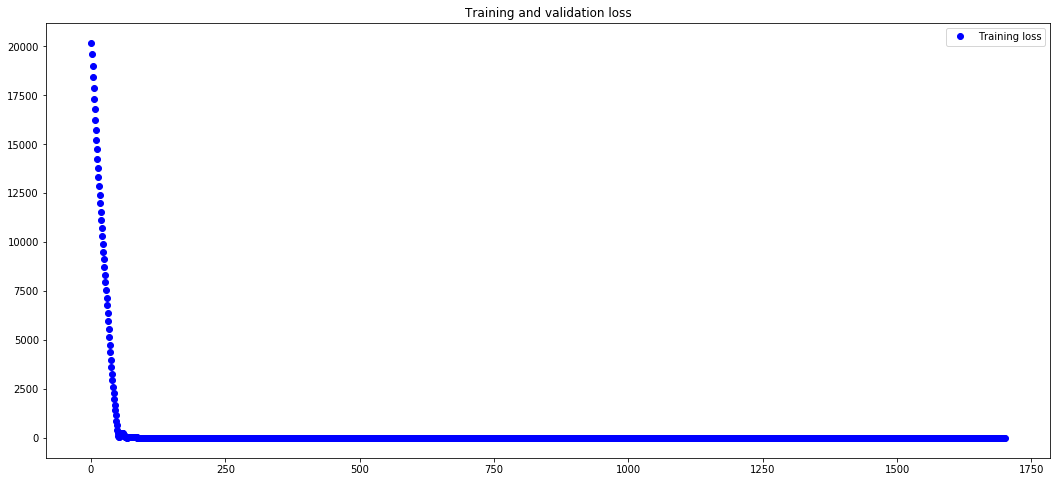

In [20]:
import matplotlib.pyplot as plt
loss = history.history['loss'] 

epochs = range(1, len(loss) + 1) 

plt.figure(figsize=(18, 8))
plt.plot(epochs, loss, 'bo', label='Training loss') 

#plt.ylim(0, 0.003)
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x1 = x_input[:, 0].reshape((1, n_steps))
x2 = x_input[:, 1].reshape((1, n_steps))
yhat = model.predict([x1, x2], verbose=0)

print(yhat)

[[205.32478]]
